Test score: 0.97


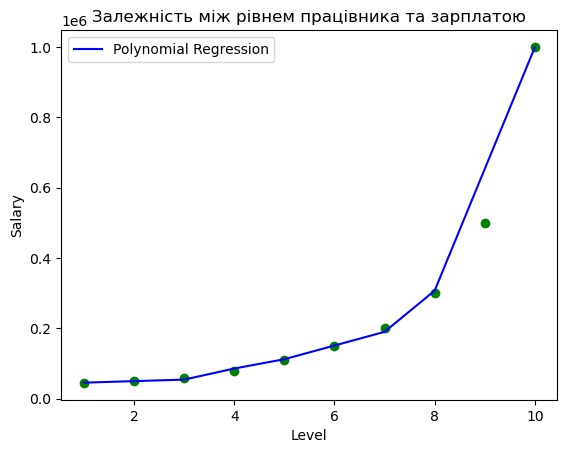

In [92]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import operator

df_salaries=pd.read_csv('Position_Salaries.csv')

X = df_salaries['Level']
y = df_salaries['Salary']
X_array = np.array(X).reshape(-1, 1)
y_array = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X_array, y_array, train_size=0.7, random_state=42)

polynomial_features = PolynomialFeatures(degree=4)
X_poly = polynomial_features.fit_transform(X_train)

model = LinearRegression()
model.fit(X_poly, y_train)
y_poly_predict = model.predict(X_poly)

sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X_train, y_poly_predict), key = sort_axis)
X_train, y_poly_predict = zip(*sorted_zip)

X_poly_test = polynomial_features.fit_transform(X_test)
score = model.score(X_poly_test, y_test)
print("Test score: {:.2f}".format(score))

fig, ax = plt.subplots()
plt.scatter(X_array, y_array, color = 'green')
plt.plot(X_train, y_poly_predict, color = 'blue', label='Polynomial Regression')
ax.set_xlabel("Level")
ax.set_ylabel("Salary")
ax.set_title("Залежність між рівнем працівника та зарплатою")
plt.legend()
plt.show()

In [97]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

df = pd.read_csv('communities.csv')
df_communities = df.replace('?', 0)
df_communities = df_communities.drop('Lakewoodcity', axis='columns')
df_communities = df_communities.rename(columns = {"?":"1.2", "?.1":"1.1"})


X_array = np.array(df_communities.iloc[:, :-1])
y_array = np.array(df_communities.iloc[:, -1])

X_train, X_test, y_train, y_test = train_test_split(X_array, y_array, test_size=0.3, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

print(f"Linear Regression-Training set score: {lr.score(X_train, y_train):.2f}")
print(f"Linear Regression-Test set score: {lr.score(X_test, y_test):.2f}")


lasso = Lasso(alpha=0.0001).fit(X_train, y_train)
print(f"\nLasso Regression-Training set score: {lasso.score(X_train, y_train):.2f}")
print(f"Lasso Regression-Test set score: {lasso.score(X_test, y_test):.2f}")


ridge = Ridge(alpha=0.6).fit(X_train, y_train)
print(f"\nRidge Regression-Training set score: {ridge.score(X_train, y_train):.2f}")
print(f"Ridge Regression-Test set score: {ridge.score(X_test, y_test):.2f}")


elastic_net = ElasticNet(alpha=0.001, l1_ratio=0.01).fit(X_train, y_train)
print(f"\nElastic Net-Training set score: {elastic_net.score(X_train, y_train):.2f}")
print(f"Elastic Net-Test set score: {elastic_net.score(X_test, y_test):.2f}")

Linear Regression-Training set score: 0.71
Linear Regression-Test set score: 0.65

Lasso Regression-Training set score: 0.70
Lasso Regression-Test set score: 0.67

Ridge Regression-Training set score: 0.71
Ridge Regression-Test set score: 0.67

Elastic Net-Training set score: 0.70
Elastic Net-Test set score: 0.67


In [94]:
# Усі три методи регуляризації для даного набору даних дають однакові показники
